# REGINALDO GREGÓRIO DE SOUZA NETO
2252813

Importação das bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

Para realizar esta tarefa, utilizamos uma porção limitada do conjunto de dados MNIST, que abrange 1500 imagens em escala de cinza de 28x28 pixels, apresentando dígitos escritos à mão de 0 a 9. Essas imagens são convertidas em vetores de 784 pixels. As informações iniciais da base de dados incluem os valores dos pixels da imagem, que variam de 0 a 255, organizados nas primeiras 784 colunas. A última coluna indica a qual dígito a imagem corresponde. A seguir, carregamos esses dados em um DataFrame do pandas e separamos os valores em características (features) e rótulos (labels).

In [ ]:
df = pd.read_csv("mini_mnist.csv")
df.shape

(1500, 785)

Mostrando o head deu pra notar que cada atributo é referente à um pixel da imagem, com 0 ou 1 representando preto ou branco

In [ ]:
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,digito
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
y = df.values[:,-1]
X = df.values[:,:-1]

In [ ]:
y.shape, X.shape

((1500,), (1500, 784))

O subplot mostrado pelo professor em sala de aula para que possamos visualizar a base de dados de maneira intuitiva

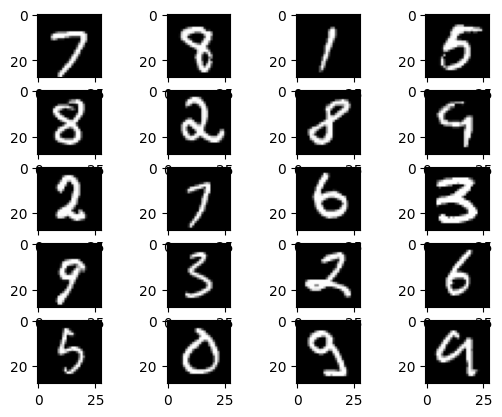

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=5)
for idx in range(20):
    lin = idx % 5
    col = idx // 5
    ax[lin][col].imshow(X[idx].reshape((28,28)), cmap="gray")

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Dado que cada instância possui 784 características (pixels), a visualização das instâncias com base em cada uma delas torna-se impraticável. Portanto, optou-se por empregar um gráfico de dispersão após a aplicação da técnica de redução de dimensionalidade PCA aos dados normalizados de entrada, como uma maneira de facilitar a compreensão da distribuição das instâncias.

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_s = scaler.transform(X)

Após rodar o PCA, podemos analisar que de 784 atributos, foram transformados em apenas 2

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_s)
X_pca = pca.transform(X_s)

X.shape, X_pca.shape

((1500, 784), (1500, 2))

Dado que cada instância possui 784 características (pixels), a visualização das instâncias com base em cada uma delas torna-se impraticável. Portanto, optou-se por empregar um gráfico de dispersão após a aplicação da técnica de redução de dimensionalidade PCA aos dados normalizados de entrada, como uma maneira de facilitar a compreensão da distribuição das instâncias.

In [ ]:
df2 = pd.DataFrame(X_pca, columns = ["PC0", "PC1"])
df2["digito"] = y

df2.head()

,PC0,PC1,digito
0,-2.775723,1.176628,7
1,0.950564,1.247798,8
2,-1.346509,3.850944,2
3,-7.267148,-3.454706,9
4,-2.603981,1.768279,5


Nota-se que o plot dos dois atributos gerados pelo PCA se encontra muito misto e com difícil interpretação.

<Axes: xlabel='PC0', ylabel='PC1'>

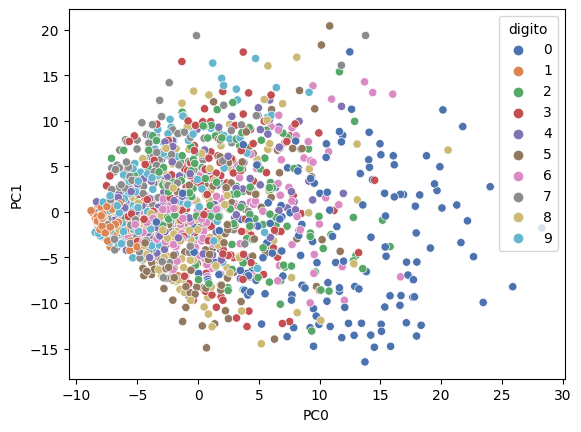

In [ ]:
sns.scatterplot(data=df2, x='PC0', y='PC1', hue='digito', palette='deep')

## KNN

Para avaliar o desempenho do KNN que já foi explicado em outras atividades e nas aulas, o conjunto de dados foi particionado em k partes de igual tamanho e aleatoriamente reorganizadas. No nível interno desse processo, empregou-se o GridSearchCV para ajustar o modelo, testando diferentes valores para o número de vizinhos, e avaliando o desempenho por meio de validação cruzada estratificada. Para fins de exibição das melhores classificações rodei ele 2 vezes, uma com os atributos normais e outra de acordo com os atributos gerados pelo PCA.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def do_cv_knn(X, y, kfolds, ks=[1]):

    kparticoes = kfolds
    kparticoes2 = 10

    acuracias = []

    skf = StratifiedKFold(n_splits=kparticoes, shuffle=True,
                            random_state=1)

    for idx_treino, idx_teste in skf.split(X, y):

        X_treino = X[idx_treino]
        y_treino = y[idx_treino]

        X_teste = X[idx_teste]
        y_teste = y[idx_teste]

        scaler = StandardScaler()
        scaler.fit(X_treino)
        X_treino = scaler.transform(X_treino)
        X_teste = scaler.transform(X_teste)

        params = { "n_neighbors" : ks }
        knn = KNeighborsClassifier()
        knn = GridSearchCV(knn, params,
                        cv=StratifiedKFold(kparticoes2))

        knn.fit(X_treino, y_treino)

        acuracias.append(accuracy_score(y_teste,
                                        knn.predict(X_teste)))

    return acuracias


Utilizando as 784 colunas da base de dados normal, o KNN demorou 31 segundos e obteve uma acurácia de 84%

In [ ]:
accs_knn = do_cv_knn(X, y, 10, range(1,30,2))

In [ ]:
def calcular_estatisticas(resultados):
    return np.mean(resultados), np.std(resultados), np.min(resultados), np.max(resultados)

In [ ]:
def imprimir_estatisticas(resultados):
    media, desvio, mini, maxi = calcular_estatisticas(resultados)
    print("Resultados: %.2f +- %.2f, min: %.2f, max: %.2f" %
          (media, desvio, mini, maxi))

In [ ]:
imprimir_estatisticas(accs_knn)

Resultados: 0.84 +- 0.03, min: 0.79, max: 0.89


Agora rodando com o PCA, o tempo reduziu mais da metade, demorando 12 segundos para a execução tendo em vista que agora apenas 2 atributos são analisados. Entretando a acurácia obtida foi de 31% o que é um resultado péssimo.

In [ ]:
accs_knn_pca = do_cv_knn(X_pca, y, 10, range(1,30,2))

In [ ]:
def calcular_estatisticas(resultados):
    return np.mean(resultados), np.std(resultados), np.min(resultados), np.max(resultados)

In [ ]:
def imprimir_estatisticas(resultados):
    media, desvio, mini, maxi = calcular_estatisticas(resultados)
    print("Resultados: %.2f +- %.2f, min: %.2f, max: %.2f" %
          (media, desvio, mini, maxi))

In [ ]:
imprimir_estatisticas(accs_knn_pca)

Resultados: 0.31 +- 0.02, min: 0.27, max: 0.35


## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
def do_cv_svm(X, y, kfolds):

    kparticoes = kfolds
    kparticoes2 = 10

    acuracias = []

    skf = StratifiedKFold(n_splits=kparticoes, shuffle=True,
                            random_state=1)

    for idx_treino, idx_teste in skf.split(X, y):

        X_treino = X[idx_treino]
        y_treino = y[idx_treino]

        X_teste = X[idx_teste]
        y_teste = y[idx_teste]

        scaler = StandardScaler()
        scaler.fit(X_treino)
        X_treino = scaler.transform(X_treino)
        X_teste = scaler.transform(X_teste)

        params = {
            "C" : np.logspace(0, 4, 5, base=10),
            "gamma" : list(np.logspace(-5, -2, 4, base=2)) + ["auto", "scale"]
        }
        svm = SVC(kernel="rbf")
        svm = GridSearchCV(svm, params,
                        cv=StratifiedKFold(kparticoes2))

        svm.fit(X_treino, y_treino)

        acuracias.append(accuracy_score(y_teste,
                                        svm.predict(X_teste)))

    return acuracias


Após exaustivos 48 minutos de execução o SVM gerou 88% de acurácia se mostrando superior ao KNN em apenas 4%, mas a que custo? Em seguida vou testar o SVM com os atributos do PCA para ver se vale a pena.

In [ ]:
accs_svm = do_cv_svm(X, y, 10)

In [ ]:
imprimir_estatisticas(accs_svm)

Resultados: 0.88 +- 0.02, min: 0.85, max: 0.93


In [ ]:
imprimir_estatisticas(accs_knn)

Resultados: 0.84 +- 0.03, min: 0.79, max: 0.89


Realizando o ttest só para validar o uso KNN ao invés do SVM mostrand oque o pvalor é menor do que 0.05

In [ ]:
from scipy.stats import ttest_ind_from_stats

In [ ]:
med_svm, desv_svm, _, _ = calcular_estatisticas(accs_svm)
med_knn, desv_knn, _, _ = calcular_estatisticas(accs_knn)

In [ ]:
_, pvalor = ttest_ind_from_stats(med_svm, desv_svm, 10, med_knn, desv_knn, 10)

In [ ]:
pvalor <= 0.05

True

Teste do SVM com os atributos do PCA

In [ ]:
accs_svm_pca = do_cv_svm(X_pca, y, 10)

E a suspeita se confirmou, o SVM com os atributos do PCA demorou 39 minutos para executar e alcançou 34%, ou seja, inviável também. Nessa base de dados específica nota-se que o uso do PCA é meramente visual. Pois para ser utilizado no classificador não vale a pena.

In [ ]:
imprimir_estatisticas(accs_svm_pca)

Resultados: 0.34 +- 0.02, min: 0.30, max: 0.39
